# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 10

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [51]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [52]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

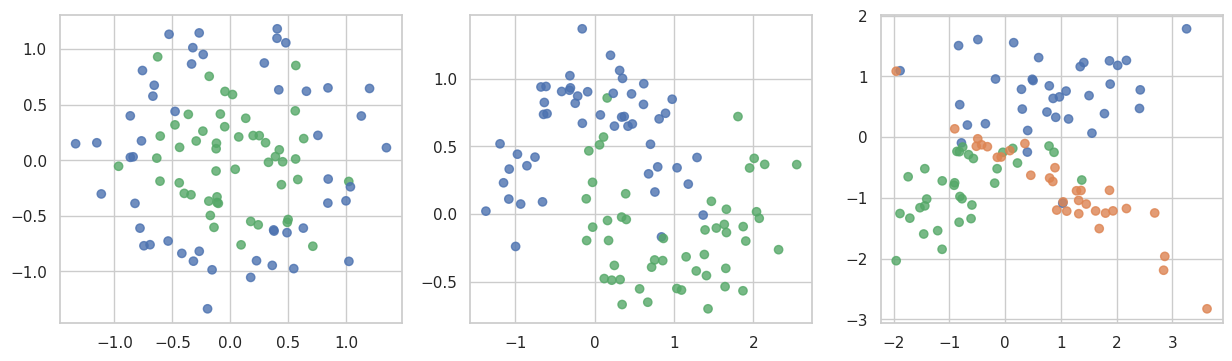

In [53]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

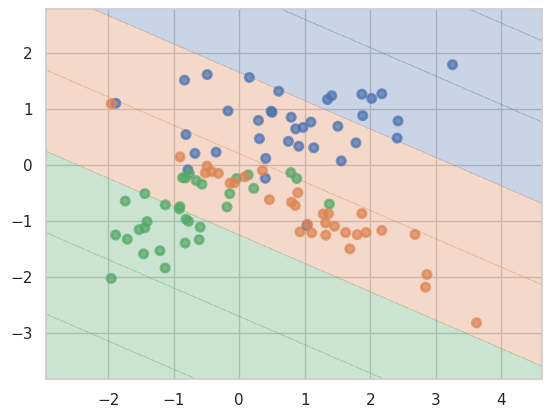

In [56]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Датасет make_circles

Accuracy Train = 1.0


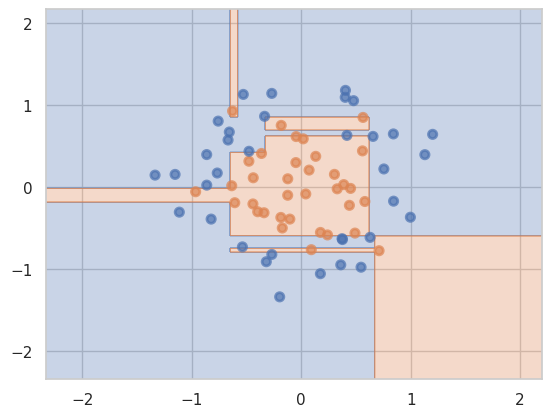

In [57]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=73)

tree = DecisionTreeClassifier().fit(X_train, y_train)

plot_surface(tree, X_train, y_train)

acc = accuracy_score(y_train, tree.predict(X_train))

print("Accuracy Train =", acc)

Accuracy Test = 0.8666666666666667


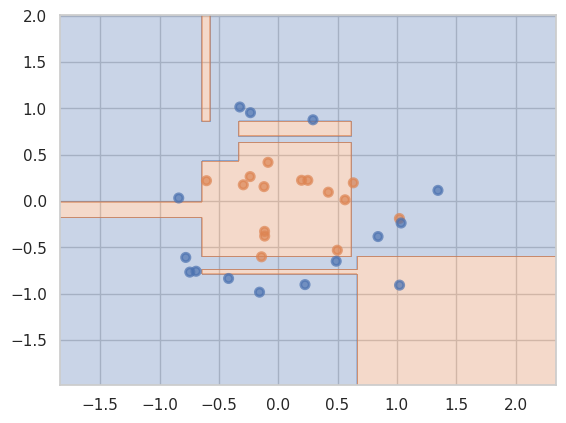

In [58]:
plot_surface(tree, X_test, y_test)

acc = accuracy_score(y_test, tree.predict(X_test))

print("Accuracy Test =", acc)

Датасет make_moons

Accuracy Train = 1.0


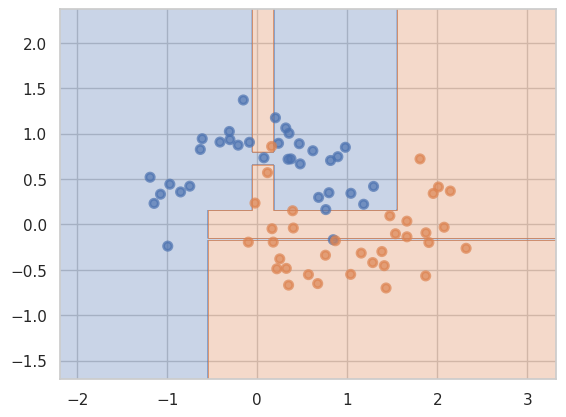

In [59]:
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=73)

tree = DecisionTreeClassifier().fit(X_train, y_train)

plot_surface(tree, X_train, y_train)

acc = accuracy_score(y_train, tree.predict(X_train))

print("Accuracy Train =", acc)

Accuracy Test = 0.9333333333333333


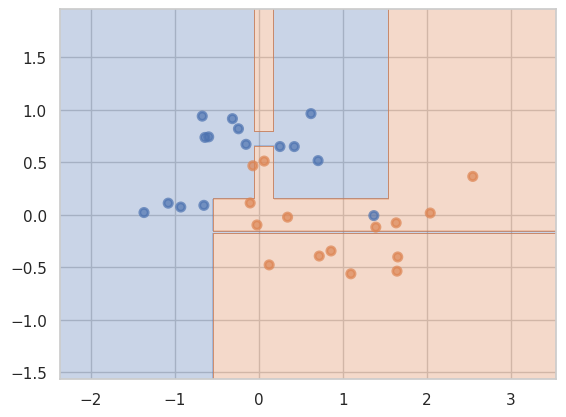

In [60]:
plot_surface(tree, X_test, y_test)

acc = accuracy_score(y_test, tree.predict(X_test))

print("Accuracy Test =", acc)

Датасет make_classification

Accuracy Train = 1.0


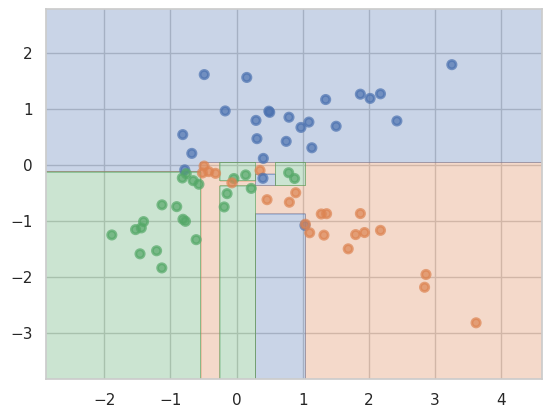

In [61]:
X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=73)

tree = DecisionTreeClassifier().fit(X_train, y_train)

plot_surface(tree, X_train, y_train)

acc = accuracy_score(y_train, tree.predict(X_train))

print("Accuracy Train =", acc)

Accuracy Test = 0.8333333333333334


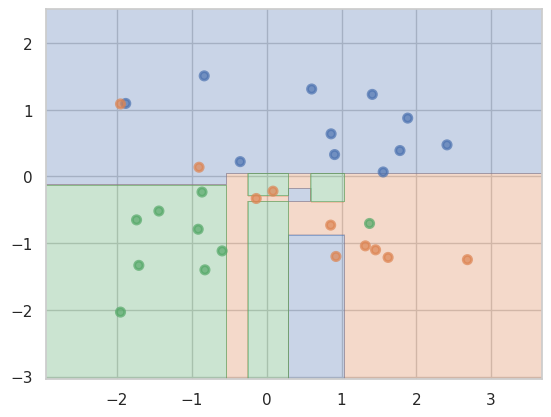

In [62]:
plot_surface(tree, X_test, y_test)

acc = accuracy_score(y_test, tree.predict(X_test))

print("Accuracy Test =", acc)

__Ответ:__ я тут еще random_state разный пробовал, вот при этом наилучшее обучение, деревья не переобучаются сильно, а вот при random_state в разбиении = 42 там уже у make_classification было качество на тесте 0.66

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [63]:
from ipywidgets import interact, IntSlider

Датасет make_circles

In [64]:
X, y = datasets[0]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=73)

def paint_tree(max_depth=1, min_samples_leaf=1):
    tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    tree.fit(X_train, y_train)
    plot_surface(tree, X_train, y_train)
    y_pred = tree.predict(X_test)
    plt.text(s=f'Test accuracy: {round(accuracy_score(y_pred, y_test), 2)}\nTrain accuracy: {round(accuracy_score(y_train, tree.predict(X_train)), 2)}', x=2.5, y=2.5)
    plt.show()

In [66]:
depth_param = IntSlider(min=1, max=10, value=1, description='max_depth')
min_samples_param = IntSlider(min=1, max=10, value=1, description='min_leaf')

interact(paint_tree, max_depth=depth_param, min_samples_leaf=min_samples_param)
plt.show()

interactive(children=(IntSlider(value=1, description='max_depth', max=10, min=1), IntSlider(value=1, descripti…

Датасет make_moons

In [67]:
X, y = datasets[1]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=73)

def paint_tree(max_depth=1, min_samples_leaf=1):
    tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    tree.fit(X_train, y_train)
    plot_surface(tree, X_train, y_train)
    y_pred = tree.predict(X_test)
    plt.text(s=f'Test accuracy: {round(accuracy_score(y_pred, y_test), 2)}\nTrain accuracy: {round(accuracy_score(y_train, tree.predict(X_train)), 2)}', x=2.5, y=2.5)
    plt.show()

In [69]:
depth_param = IntSlider(min=1, max=10, value=1, description='max_depth')
min_samples_param = IntSlider(min=1, max=10, value=1, description='min_samples_leaf')

interact(paint_tree, max_depth=depth_param, min_samples_leaf=min_samples_param)
plt.show()

interactive(children=(IntSlider(value=1, description='max_depth', max=10, min=1), IntSlider(value=1, descripti…

Датасет make_classification

In [70]:
X, y = datasets[2]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=73)

def paint_tree(max_depth=1, min_samples_leaf=1):
    tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    tree.fit(X_train, y_train)
    plot_surface(tree, X_train, y_train)
    y_pred = tree.predict(X_test)
    plt.text(s=f'Test accuracy: {round(accuracy_score(y_pred, y_test), 2)}\nTrain accuracy: {round(accuracy_score(y_train, tree.predict(X_train)), 2)}', x=2.5, y=2.5)
    plt.show()

In [72]:
depth_param = IntSlider(min=1, max=10, value=1, description='max_depth')
min_samples_param = IntSlider(min=1, max=10, value=1, description='min_samples_leaf')

interact(paint_tree, max_depth=depth_param, min_samples_leaf=min_samples_param)
plt.show()

interactive(children=(IntSlider(value=1, description='max_depth', max=10, min=1), IntSlider(value=1, descripti…

__Ответ:__

во всех датасетах при увеличении max_depth качество трейна растет до 1 включительно, это и очевидно, так как дерево можно хорошо обучить, идеально подогнать под выборку.
Однако качество теста ведет себя неоднозначно при изменении параметра глубины - в последнем датасете тест растет, а в первом достигает пика при небольших значениях.
Качество теста в среднем при увеличении глубины здесь растет тоже. Но на какой-то большой глубине уже понятно падает, то есть растет как какая-то выпуклая функция.
От количества листьев здесь я увидел некую закономерность, что в целом при увеличении числа листьев с минимального растет train и падает test, однако при приближении к 10 при увеличении качество test растет, а вот у train падает.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py



Ссылка на посылку: https://contest.yandex.ru/contest/56884/run-report/102672265/

Ник в контесте: ekryabov@edu.hse.ru

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [73]:
df = pd.read_csv("students.csv")
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [74]:
from hw5code import find_best_split

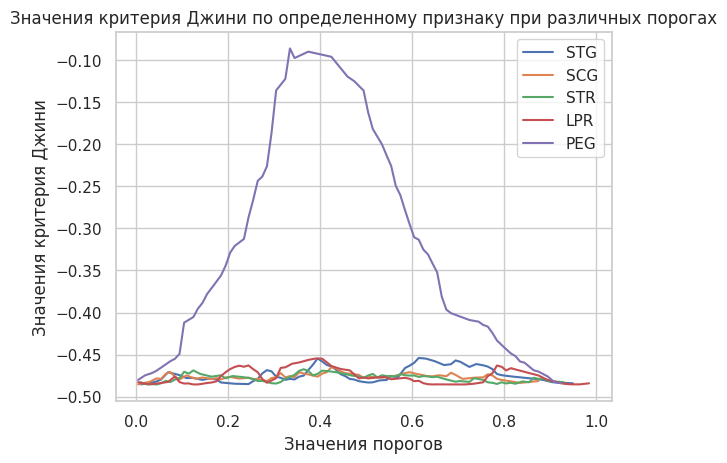

In [75]:
for i in df.columns[:-1]:
    thr, ginis, _, _ = find_best_split(np.array(df[i]), np.array(df['UNS']))
    plt.plot(thr, ginis, label=i)
plt.legend()
plt.title("Значения критерия Джини по определенному признаку при различных порогах")
plt.xlabel("Значения порогов")
plt.ylabel("Значения критерия Джини")
plt.show()

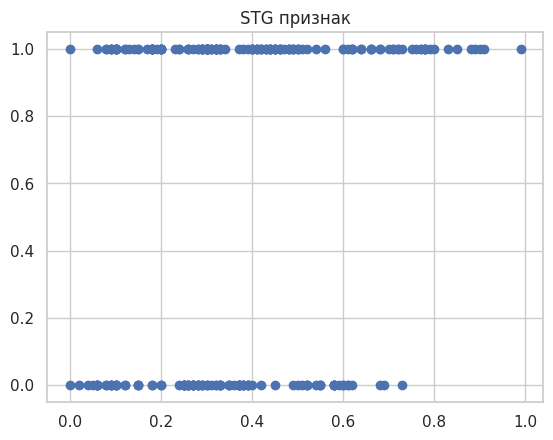

In [76]:
plt.scatter(df['STG'], df['UNS'], label=i)
plt.title("STG признак")
plt.show()

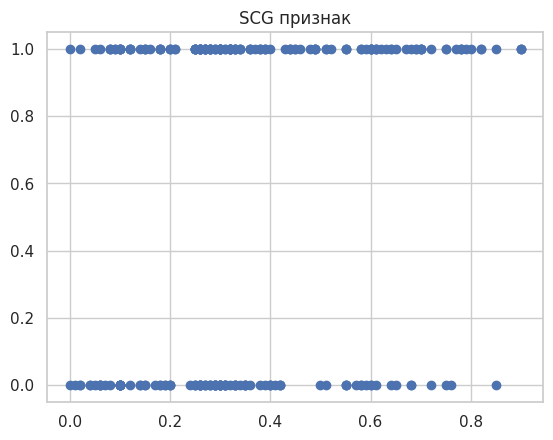

In [77]:
plt.scatter(df['SCG'], df['UNS'], label=i)
plt.title("SCG признак")
plt.show()

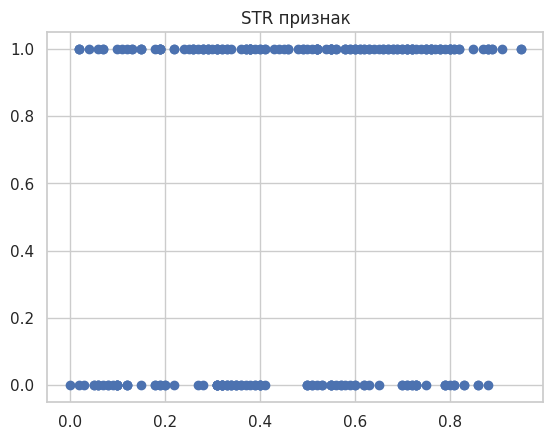

In [78]:
plt.scatter(df['STR'], df['UNS'], label=i)
plt.title("STR признак")
plt.show()

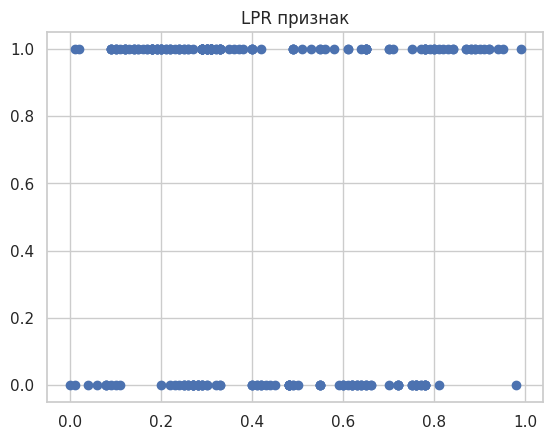

In [79]:
plt.scatter(df['LPR'], df['UNS'], label=i)
plt.title("LPR признак")
plt.show()

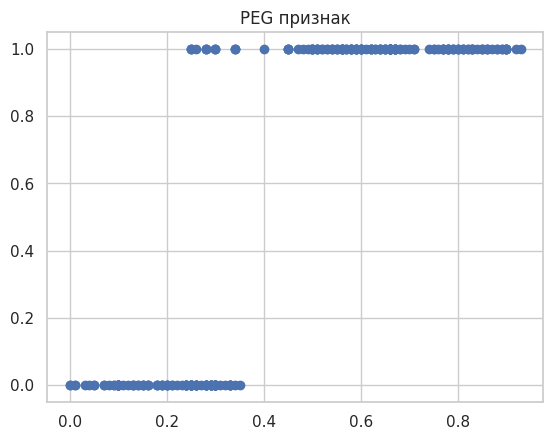

In [80]:
plt.scatter(df['PEG'], df['UNS'], label=i)
plt.title("PEG признак")
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**
Нужно делать деление выборки по признаку PEG, потому что у него достигается наибольшее значение критерия Джини среди всех признаков, да и на всех практически порогах он лучше других признаков.

Этот результат очень согласуется с визуальной оценкой scatter-графиков, мы видим такое четкое практически разделение в графике PEG, что как бы можно несколькими порогами оптимально поделить на 2 класса, а вот с остальными признаками так нельзя, там точки разбросаны везде по графику.

Хороший вид кривой, думаю, парабола с ветвями вниз или что-то похожее на нее.
Или можно даже трапециевидное что-то, главное, чтобы функция имела "хорошие" возрастания.

Кривые для признаков, по которым деление практически невозможно, отличаются тем, что у них нет "сильных" промежутков возрастания или относительно больших максимумов, при всех порогах у них низкие значения критерия Джини и просто немного колеблются.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

Ссылка на успешную посылку: https://contest.yandex.ru/contest/56884/run-report/102714151/

Ник в контесте: ekryabov@edu.hse.ru

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [81]:
mushrooms = pd.read_csv("agaricus-lepiota.data")
mushrooms.head(5)

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [82]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [83]:
for i in mushrooms.columns:
    mushrooms[i] = LabelEncoder().fit_transform(mushrooms[i])

In [84]:
mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [85]:
X_train, X_test, y_train, y_test = train_test_split(mushrooms.drop(columns='p'), mushrooms['p'], test_size=0.5, random_state=73)

In [86]:
from hw5code import DecisionTree

In [87]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
tree = DecisionTree(['categorical'] * len(X_train))
tree.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred = tree.predict(X_test.to_numpy())
print(f"accuracy: {accuracy_score(y_test, y_pred)}")

accuracy: 1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [88]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
tic_tac_toe = pd.read_csv("tic-tac-toe-endgame.csv")
cars = pd.read_csv("car.data")
nursery = pd.read_csv("nursery.data")

In [89]:
tic_tac_toe.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [90]:
from sklearn.preprocessing import LabelEncoder

for i in mushrooms.columns:
    mushrooms[i] = LabelEncoder().fit_transform(mushrooms[i])

for i in tic_tac_toe.columns:
    tic_tac_toe[i] = LabelEncoder().fit_transform(tic_tac_toe[i])

In [91]:
cars.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [92]:
cars['unacc'][(cars['unacc'] == 'unacc') | (cars['unacc'] == 'acc')] = 0
cars['unacc'][(cars['unacc'] == 'good') | (cars['unacc'] == 'vgood')] = 1

In [93]:
cars.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,0
1,vhigh,vhigh,2,2,small,high,0
2,vhigh,vhigh,2,2,med,low,0
3,vhigh,vhigh,2,2,med,med,0
4,vhigh,vhigh,2,2,med,high,0


In [94]:
for i in cars.columns:
    cars[i] = LabelEncoder().fit_transform(cars[i])

In [95]:
nursery.head()

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom


In [96]:
nursery['recommend'][(nursery['recommend'] == 'not_recom') | (nursery['recommend'] == 'recommend')] = 0
nursery['recommend'][(nursery['recommend'] == 'very_recom') | (nursery['recommend'] == 'priority') | (nursery['recommend'] == 'spec_prior')] = 1

In [97]:
nursery.head()

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,1
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,0
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,0
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,1
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,0


In [98]:
for i in nursery.columns:
    nursery[i] = LabelEncoder().fit_transform(nursery[i])

In [99]:
data_arr = [
    (mushrooms.drop(columns={'p'}), mushrooms['p'], "mushrooms"),
    (nursery.drop(columns={'recommend'}), nursery['recommend'], "nursery"),
    (cars.drop(columns={'unacc'}), cars['unacc'], "cars"),
    (tic_tac_toe.drop(columns={'V10'}), tic_tac_toe['V10'], "tic_tac_toe")
    ]

In [100]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

In [101]:
df_stat = pd.DataFrame()
df_stat['Датасет'] = []
df_stat['Real признаки'] = []
df_stat['Categorical признаки'] = []
df_stat['признаки Real + OHE всех признаков'] = []
df_stat['sklearn'] = []
df_stat

,Датасет,Real признаки,Categorical признаки,признаки Real + OHE всех признаков,sklearn


In [102]:
for X_train, y_train, name in data_arr:
    tree = DecisionTree(['real'] * X_train.shape[1])
    res_real = np.mean(cross_val_score(tree, X_train.to_numpy(), y_train.to_numpy(), cv=10, scoring=make_scorer(accuracy_score)))

    tree = DecisionTree(['categorical'] * X_train.shape[1])
    res_cat = np.mean(cross_val_score(tree, X_train.to_numpy(), y_train.to_numpy(), cv=10, scoring=make_scorer(accuracy_score)))

    ohe = OneHotEncoder(sparse=False)
    X_new = np.concatenate((X_train, ohe.fit_transform(X_train)), axis=1)
    tree = DecisionTree(['real'] * X_train.shape[1], ['categorical'] * (X_new.shape[1] - X_train.shape[1]))
    res_ohe = np.mean(cross_val_score(tree, X_train.to_numpy(), y_train.to_numpy(), cv=10, scoring=make_scorer(accuracy_score)))

    tree = DecisionTreeClassifier()
    res_orig = np.mean(cross_val_score(tree, X_train.to_numpy(), y_train.to_numpy(), cv=10, scoring=make_scorer(accuracy_score)))
    df_stat = df_stat.append({'Датасет': name, 'Real признаки': res_real, 'Categorical признаки': res_cat, 'признаки Real + OHE всех признаков': res_ohe,
                   'sklearn': res_orig}, ignore_index=True)

df_stat

,Датасет,Real признаки,Categorical признаки,признаки Real + OHE всех признаков,sklearn
0,mushrooms,0.999261,1.000000,0.999261,0.962723
1,nursery,0.999846,0.999923,0.999846,0.999846
2,cars,0.942600,0.967519,0.942600,0.944371
3,tic_tac_toe,0.467533,0.541458,0.467533,0.760241


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** вообще говоря, если так посмотреть то ранжирование следующее:

mushrooms - categorical, real и real+ohe, sklearn

nursery - categorical, real и real+ohe и sklearn

cars - categorical, real и real+ohe, sklearn

tic_tac_toe - sklearn, categorical, real, real+ohe

И отсюда можно понять, что categorical - лучший способ именно для этих датасетов, потому что у нас данные все из категориальных признаков, очевидно, что на переводе в real качество испортится, однако 3 датасета приспособлены к переходу на real признаки. Real и real+ohe тут не отличаются практически, а даже и совпадают.
У нас в целом есть один неудачный датасет - tic_tac_toe, тут даже sklearn дерево не дало прям оч хороший результат, а наши способы и вовсе подкачали.
Наверно, этот датасет не очень хорошо покрывает разные случаи.(хотя может зависеть от разбиения)

Про случайность - в некоторых датасетах в столбцах действительно есть компоненты случайности, как по мне, т.к. есть объекты с разными 2-3 признаками, но при этом одного класса, и причем признаки очень различаются как по мне, и это все-таки скорее случайность, чем закономерность.

Решать такую проблему можно, разбивая например наш датасет на несколько, где в каждом будем по определенному критерию выкидывать такие лишние объекты, точнее случайные, которые портят качество.

Вставьте что угодно, описывающее ваши впечатления от этого задания:

https://www.youtube.com/watch?v=FxyuA3E62bY